In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [100]:
df = pd.read_csv(r'C:\Programacion\Datasets\red-wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [101]:
df.columns = ['_'.join(x.split()) for x in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.alcohol.mode()

0    9.5
Name: alcohol, dtype: float64

In [7]:
df.alcohol.mean()

10.422983114446529

In [8]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [102]:
X = df.drop('quality',axis=1)
y = df.quality
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [103]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [7]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR

In [35]:
rango= range(1,11)
X_score, y_score = validation_curve(SVR(),X_train_std,y_train,param_name='C',param_range=rango,scoring='neg_mean_absolute_error')

X_score,y_score = [np.mean(x) for x in X_score], [np.mean(y) for y in y_score]

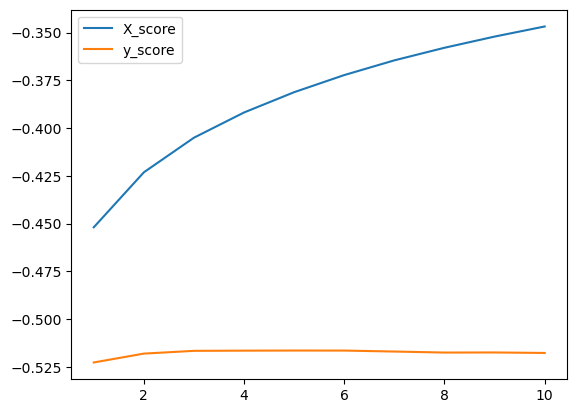

In [36]:
plt.plot(rango,X_score,label='X_score')
plt.plot(rango,y_score,label='y_score')
plt.legend()

In [39]:
svr = SVR(C=2)
svr.fit(X_train_std,y_train)
y_pred= svr.predict(X_test_std)

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
print(f'{mean_squared_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}')

0.47819416358772454,0.5116473080163585


In [55]:
print(f'{mean_squared_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}')

0.3785574626281031,0.4284653302870908


# Optimizando

In [79]:
from xgboost import XGBRegressor

In [11]:
from sklearn import metrics

In [12]:
from sklearn.svm import LinearSVR

In [96]:
from hyperopt import hp,Trials,fmin,tpe,STATUS_OK
space = {'n_estimators': hp.quniform('n_estimators',70,90,1),'max_depth':hp.quniform('max_depth',1,10,1),'learning_rate': hp.uniform('learning_rate',0.001,0.1),'subsample': hp.uniform('subsample',0,1)}
def objective(space):
    model = XGBRegressor(n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),learning_rate=space['learning_rate'],subsample=space['subsample'])
    evaluation = [( X_train_std, y_train), ( X_test_std, y_test)]
    model.fit(X_train_std, y_train)
    pred = model.predict(X_test_std)
    mae = metrics.mean_absolute_error(y_test, pred)
    return {'loss': mae , 'status': STATUS_OK }
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [00:37<00:00,  2.68trial/s, best loss: 0.39915391668981437]


In [97]:
best_hyperparams

{'learning_rate': 0.09672634278453655,
 'max_depth': 10.0,
 'n_estimators': 86.0,
 'subsample': 0.828832523230187}

In [53]:
svr = SVR(C=2,epsilon=0.042164080646893476)
svr.fit(X_train_std,y_train)
y_pred= svr.predict(X_test_std)

In [54]:
print(f'{mean_squared_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}')

0.3785574626281031,0.4284653302870908


In [98]:
xgb = XGBRegressor(n_estimators=86,max_depth=10,learning_rate=0.09672634278453655,subsample=0.828832523230187)
xgb.fit(X_train_std,y_train)
y_pred = xgb.predict(X_test_std)

In [108]:
print(f'{mean_squared_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}')

0.591624631006507,0.601929922401905


In [109]:
y_pred = xgb.predict(X_test_std)

In [107]:
print(f'{mean_squared_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}')

0.591624631006507,0.601929922401905


In [113]:
new = pd.read_csv(r'C:\Programacion\Datasets\archive (1)\winequality-white.csv')
new.columns = ['_'.join(x.split()) for x in df.columns]

In [114]:
X = new.drop('quality',axis=1)
y = new.quality
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [115]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [116]:
y_test

925     5
1661    6
4493    6
1702    4
2007    6
       ..
4315    7
3921    5
4156    5
2837    6
1529    6
Name: quality, Length: 980, dtype: int64